In [2]:
### uncomment to display figures
%matplotlib inline

# Demonstrates benchmarking functionality - OzNet Soil Moisture

#### Benchmarking dataset information
The soil moisture content (in mm) dataset consists of time-series of volumetric soil moisture  reflectometer measurements at various depths within the soil profile (top:0-5/8cm, shallow:0-30cm, middle:30-60cm, deep:60-90cm) for sites across the Murrumbidgee catchment, New South Wales, Australia
<br>
##### Source:
Smith, A.B., Walker, J.P., Western, A.W., Young, R.I., Ellett, K.M., Pipunic, R.C., Grayson, R.B., Siriwardena, L., Chiew, F.H.S. and Richter, H., 2012. The Murrumbidgee soil moisture monitoring network data set. Water Resources Research, 48(7): W07701

This notebook goes through the following steps:

1. Import required libraries
2. Set up benchmarking configuration <br>
 2.1 Sites to be benchmarked<br>
 2.2 Define observation inputs<br>

3. Create benchmark object<br>
4. Add models to be benchmarked <br>
 4.1 Select or unselect models<br> 
5. View benchmarking statistics<br>
6. View benchmarking plots<br>
7. Statistics plotting<br>


### 1. Import required libraries

In [17]:
from awrams.benchmarking.benchmark import BenchmarkSoilMoisture
from awrams.utils import datetools as dt
import awrams.benchmarking.config as cfg # the config file is an important one to look at in this case
import awrams.benchmarking.meta.oznet as oznet

from awrams.models.settings import TRAINING_DATA_PATH

### 2.  Set up benchmarking configuration
Comparison against observed streamflow <br>
You can use your own data in csv form similar to the example provided. <br>
It just needs to have column names matching the names used in extracting AWRA data

#### 2.1 Sites to be benchmarked
Soil moisture comparisons at OzNet sites

In [18]:
oznet_data_path = TRAINING_DATA_PATH + '/benchmarking/oznet/' # the oznet data has been pre-processed into 5 files [top, shallow, middle, deep, profile]

site_list = ['A1', 'A2', 'A3', 'A4', 'A5','M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'Y1', 'Y2', 'Y3', 'Y4', 'Y5',
             'Y6', 'Y7', 'Y8', 'Y9','Y10', 'Y11','Y12','Y13','K1', 'K2', 'K3', 'K4', 'K5','K6', 'K7', 'K8', 'K10', 'K11', 'K12', 'K13', 'K14']

mod_site_list = ['Oznet Soilmoisture_' + site for site in site_list]


### 3.  Create the benchmark object:<br> 

An object of "Benchmark" class is created by defining what variable is to be benchmarked. 
Everything else gets progressively added,  and statistics are calculated when the observation and model outputs are added.

In [19]:
oz = BenchmarkSoilMoisture("OzNet", "soil moisture", oznet.meta)

# Specify benchmarking period
oz.period = dt.dates('2002-2010')

# Add observations and catchment subset [the id list needs to be present in the column names of the observation file]
oz.load(oznet_data_path,mod_site_list)

In [20]:
sorted(oz.sites)

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'K1',
 'K10',
 'K11',
 'K12',
 'K13',
 'K14',
 'K2',
 'K3',
 'K4',
 'K5',
 'K6',
 'K7',
 'K8',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'Y1',
 'Y10',
 'Y11',
 'Y12',
 'Y13',
 'Y2',
 'Y3',
 'Y4',
 'Y5',
 'Y6',
 'Y7',
 'Y8',
 'Y9']

In [21]:
cfg.MONTHLY_REJECTION_THRESHOLD = 15

In [22]:
cfg.SM_MODEL_VARNAMES

['s0_avg', 'ss_avg', 'sd_avg']

In [23]:
cfg.SM_MODEL_LAYERS

{'s0_avg': 100.0, 'sd_avg': 5000.0, 'ss_avg': 900.0}

### 4. Add models to be benchmarked
Any number of models can be simulataneously compared
This step processes the data and calculates all the statistics [can take a while]

In [24]:
# Reading data from pre-processed csv

path = oznet_data_path+"/awral_${v}.csv"
oz.add_model("AWRAMSI_v4_0_AWRAL", csv_path=path)

In [25]:
path = oznet_data_path+"/AWRAMSI_v5QES_AWRAL_OzNet_${v}.csv"
oz.add_model("AWRAMSI_v5_0_AWRAL", csv_path=path)

In [26]:
## Sample code here to extract data at Oznet sites
# import pandas as pd
# from awrams.utils import extents
# from awrams.utils.io.data_mapping import SplitFileManager
# from awrams.utils.processing.extract import extract_from_filemanager


# site_loc_csv = '../../benchmarking/awrams/benchmarking/data/SiteLocationsWithUniqueID.csv'
# site_loc_data = pd.read_csv(site_loc_csv)
# var_names = ['s0_avg', 'ss_avg', 'sd_avg']
# data_path = '/path/to/outputs/'
# period = dt.dates('jul 2010 - jun 2011')


# for var_name in var_names:
#     pattern = data_path + '/%s*' % var_name
#     sfm = SplitFileManager.open_existing(data_path,pattern,var_name)
#     georef = sfm.get_extent()
#     extent_map = {}
    
#     for site in mod_site_list:
#         coords= site_loc_data[site_loc_data['Unique_ID']==site][['lats','lons']].values[0]
#         extent_map[site] = georef.factory.get_by_cell_coords(coords[0],coords[1])

#     df = extract_from_filemanager(sfm,
#                  extent_map,
#                  period)
#     df

#     df.to_csv('./for_oznet/'+ var_name+ '.csv' )



#### 4.1 Show list of loaded or selected models
list of loaded models is available with <tab> activated dropdown by typing "et.models."<br>
can "select" or "unselect" models for displaying

In [35]:
oz.benchmark.top.selection

['AWRAMSI_v4_0_AWRAL', 'AWRAMSI_v5_0_AWRAL']

### 5. View benchmarking statistics
Summary percentiles can be printed out by specifying a statistic from: <br> 
"grand_f", "nse", "bias_relative", "pearsons_r" (default), "mean"  <br>
to the 'stat_percentiles' function<br>
The timeframe defaults to monthly, but can be specified

These tables are pandas dataframes, so they can be exported to csv

In [30]:
oz.benchmark.top.stat_percentiles('bias')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI_v4_0_AWRAL,-5.749920,-5.286653,-0.825882,2.871729,7.625245,16.384116,18.691141
AWRAMSI_v5_0_AWRAL,-6.263814,-3.959279,0.040386,6.669860,10.781278,16.212846,16.891388


In [31]:
oz.benchmark.top.stat_percentiles('nse','d')

,0%,5%,25%,50%,75%,95%,100%
AWRAMSI_v4_0_AWRAL,-34.888129,-6.352486,-0.777557,-0.143077,0.115824,0.249762,0.292419
AWRAMSI_v5_0_AWRAL,-13.817799,-7.521132,-1.252750,-0.476639,0.103744,0.359245,0.444549


In [32]:
oz.benchmark.top.data_percentiles()

,0%,5%,25%,50%,75%,95%,100%
OzNet,7.673377,8.346994,10.179085,12.494078,15.278839,18.739803,20.776117
AWRAMSI_v4_0_AWRAL,10.301731,10.664629,13.007121,15.415882,20.305199,28.335189,31.029445
AWRAMSI_v5_0_AWRAL,11.721035,12.227892,13.447053,18.314138,23.200923,24.686576,25.610956


### 6. View benchmarking plots [time series, regression, cumulative exceedance]

specify frequency by "freq=d" for daily, "freq=m" for monthly, "freq=y" for yearly<br>
can customise titles, labels, scaling etc using standard matplotlib keyword arguments

TypeError: asfreq() missing 1 required positional argument: 'freq'

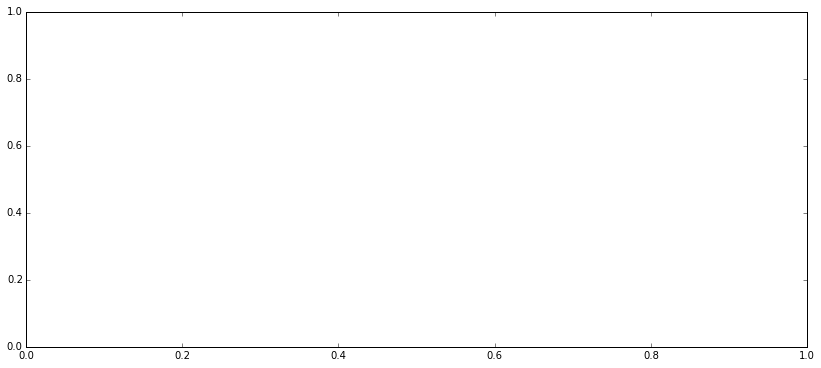

In [34]:
p = oz.benchmark.top.plot_timeseries('M1','d')

In [ ]:
p = oz.benchmark.top.plot_timeseries('Y1',freq='m')

In [ ]:
p = oz.benchmark.shallow.plot_timeseries('Y1',freq='m',ylim=[2,32])

In [ ]:
p = oz.benchmark.middle.plot_timeseries('Y1',freq='m')

In [ ]:
p = oz.benchmark.deep.plot_timeseries('Y1',freq='m')

In [ ]:
p = oz.benchmark.profile.plot_timeseries('Y1',freq='m')

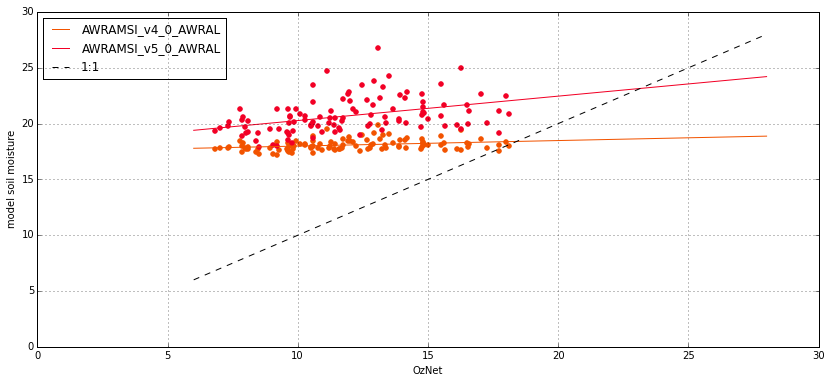

In [36]:
p = oz.benchmark.top.plot_regression('M1') #,ylim=[0,40],xlim=[0,40])

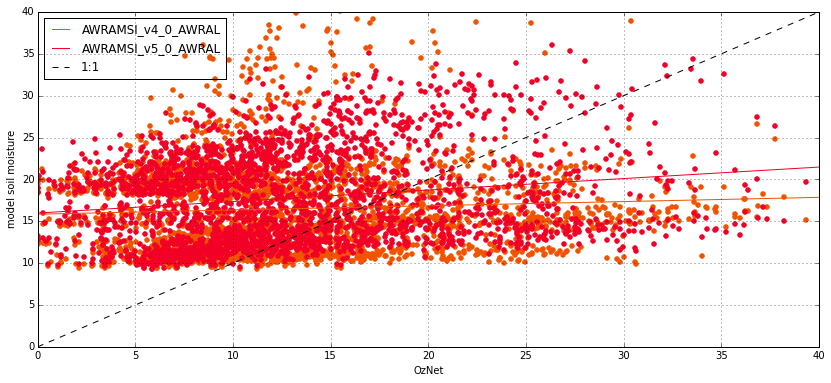

In [37]:
p = oz.benchmark.top.plot_regression(ylim=[0,40],xlim=[0,40])

### 7. Statistics plotting
specify statistic type from "fobj", "nse", "rmse", "bias_relative", "pearsons_r" (default), "mean" and <br> frequency from 'd', 'm', 'y'

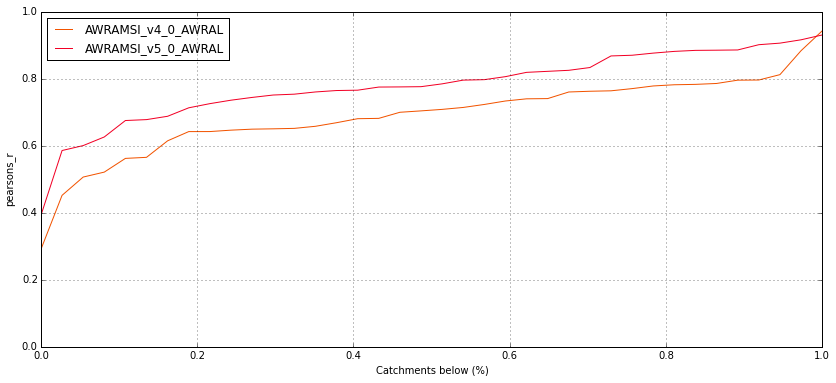

In [38]:
p = oz.benchmark.top.plot_cdf('pearsons_r', ylim=[0,1])

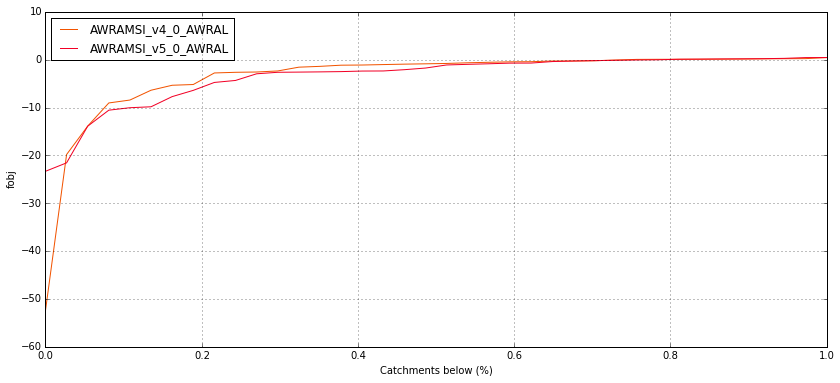

In [39]:
p = oz.benchmark.top.plot_cdf('fobj')

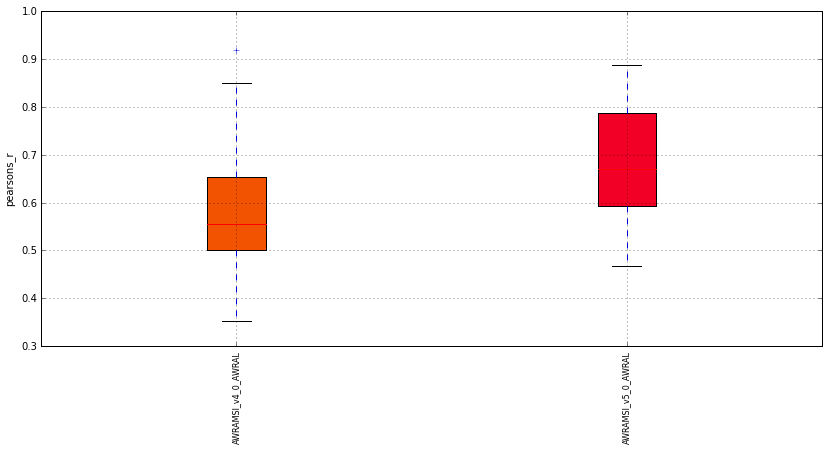

In [40]:
p = ax=oz.benchmark.top.plot_box('pearsons_r','d')